# 利用kmeans对新闻数据进行聚类
基本流程:

1. 导入数据
2. jieba分词
3. 制作词云图
4. 文本向量化，建立词频矩阵
5. 构造特征矩阵
6. 通过kmeans算法进行聚类
7. 绘制不同类别的词云图

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
news_data=pd.read_excel('../../dataset/news.xlsx')
print(news_data.info())
news_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   关键词     962 non-null    object
 1   标题      962 non-null    object
 2   网址      962 non-null    object
 3   来源      962 non-null    object
 4   时间      962 non-null    object
dtypes: object(5)
memory usage: 37.7+ KB
None


,关键词,标题,网址,来源,时间
0,华能信托,信托公司2019年上半年经营业绩概览,http://www.financialnews.com.cn/jrsb_m/xt/zx/2...,中国金融新闻网,2019年07月23日 00:00
1,华能信托,首单信托型企业ABS获批,http://www.jjckb.cn/2018-10/23/c_137552198.htm,经济参考网,2018年10月23日 12:21
2,华能信托,华能贵诚信托孙磊:金融科技助力打造开放信托生态,https://baijiahao.baidu.com/s?id=1639276579449...,同花顺财经,2019年07月17日 10:49
3,华能信托,华能贵诚信托孙磊:金融科技已经成为信托行业重要的基础设施,https://finance.qq.com/a/20190716/007898.htm,腾讯财经,2019年07月16日 18:53
4,华能信托,格力电器股权转让意向方闭门开会 华能信托赫然在列,https://finance.sina.com.cn/trust/roll/2019-05...,新浪,2019年05月22日 22:53


In [3]:
news_data.describe()

,关键词,标题,网址,来源,时间
count,962,962,962,962,962
unique,10,831,838,418,632
top,人工智能,五矿信托首任总经理辞职 接任者或为华能信托王卓,http://money.163.com/16/0909/06/C0GI1E7A002580...,百家号,7小时前
freq,100,7,7,116,30


In [4]:
news_data=news_data.rename(columns={'关键词':'keywords','标题':'title','网址':'url','来源':'source','时间':'time'})
news_data

,keywords,title,url,source,time
0,华能信托,信托公司2019年上半年经营业绩概览,http://www.financialnews.com.cn/jrsb_m/xt/zx/2...,中国金融新闻网,2019年07月23日 00:00
1,华能信托,首单信托型企业ABS获批,http://www.jjckb.cn/2018-10/23/c_137552198.htm,经济参考网,2018年10月23日 12:21
2,华能信托,华能贵诚信托孙磊:金融科技助力打造开放信托生态,https://baijiahao.baidu.com/s?id=1639276579449...,同花顺财经,2019年07月17日 10:49
3,华能信托,华能贵诚信托孙磊:金融科技已经成为信托行业重要的基础设施,https://finance.qq.com/a/20190716/007898.htm,腾讯财经,2019年07月16日 18:53
4,华能信托,格力电器股权转让意向方闭门开会 华能信托赫然在列,https://finance.sina.com.cn/trust/roll/2019-05...,新浪,2019年05月22日 22:53
...,...,...,...,...,...
957,京东,"2019京东手机金机奖大众投票开启:5G前夜,用户青睐什么样的手机?",https://baijiahao.baidu.com/s?id=1641113457834...,驱动中国,2019年08月06日 18:35
958,京东,"2019京东手机金机奖评选火热进行中,快来看看你的机型入选了吗?",https://baijiahao.baidu.com/s?id=1641112511125...,泡泡网,2019年08月06日 18:20
959,京东,德国大闸蟹泛滥成灾 其实他们可以找京东生鲜合作,https://tech.china.com/article/20190806/kejiyu...,中华网,2019年08月06日 18:00
960,京东,德国吸尘器大牌Fakir费卡伊尔登陆京东 除尘电器领域新势力来袭,https://baijiahao.baidu.com/s?id=1641111090707...,爆料大重庆,2019年08月06日 17:58


### 利用jieba对标题进行分词

In [5]:
import jieba
words=[]
for i,row in news_data.iterrows():
    word=jieba.cut(row['title']) # 对标题列进行分词
    word=' '.join(word) # 拼接成字符串
    words.append(word)
words[:5]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/p8/rq77r_b13wv5zf28yg5pxx8h0000gn/T/jieba.cache
Loading model cost 0.405 seconds.
Prefix dict has been built successfully.


['信托公司 2019 年 上半年 经营 业绩 概览',
 '首单 信托 型 企业 ABS 获批',
 '华能 贵 诚信 托孙磊 : 金融 科技 助力 打造 开放 信托 生态',
 '华能 贵 诚信 托孙磊 : 金融 科技 已经 成为 信托 行业 重要 的 基础设施',
 '格力电器 股权 转让 意向 方 闭门 开会   华能 信托 赫然 在 列']

### 制作词云图
利用wordcloud和matplotlib库制作词云图

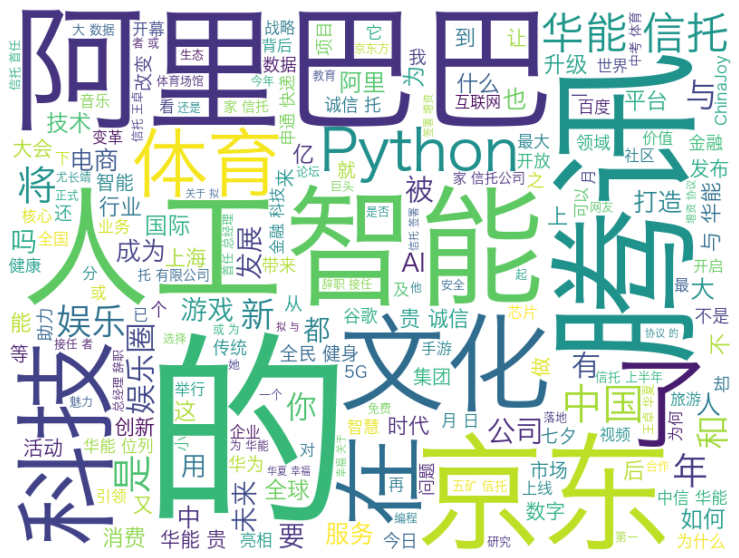

In [6]:
from wordcloud import WordCloud
font_path='/System/Library/Fonts/Hiragino Sans GB.ttc'
wordcloud=WordCloud(font_path=font_path,background_color='white',width=800,height=600).generate(' '.join(words))  # 会自动去除停用词，并且统计文本中词频
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### 文本向量化，建立词频矩阵
利用sklearn的CountVectorizer对文本进行向量化，words中的每个词去重以及出去无意义的词，进行编号，然后对应每个原文本计数该次出现的次数

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
x=vect.fit_transform(words)
x=x.toarray() #转换成ndarray
print(x.shape) 
x[:5]

(962, 3402)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 构造特征矩阵

In [8]:
words_name=vect.get_feature_names_out()
words_metrix=pd.DataFrame(x,columns=words_name)
words_metrix.head()

,00700,03,04,08s,09,10,100,11,12,150,...,黄萍,黄金,黑客,黑灰产,黑金,黑马,鼓手,鼻祖,齐聚,龙风
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 通过kmeans算法进行聚类
绘制轮廓系数随不同k值的变化图，找到最佳的k值，并且绘制在当前k值下。每一类的词云图，分析聚类的结果。

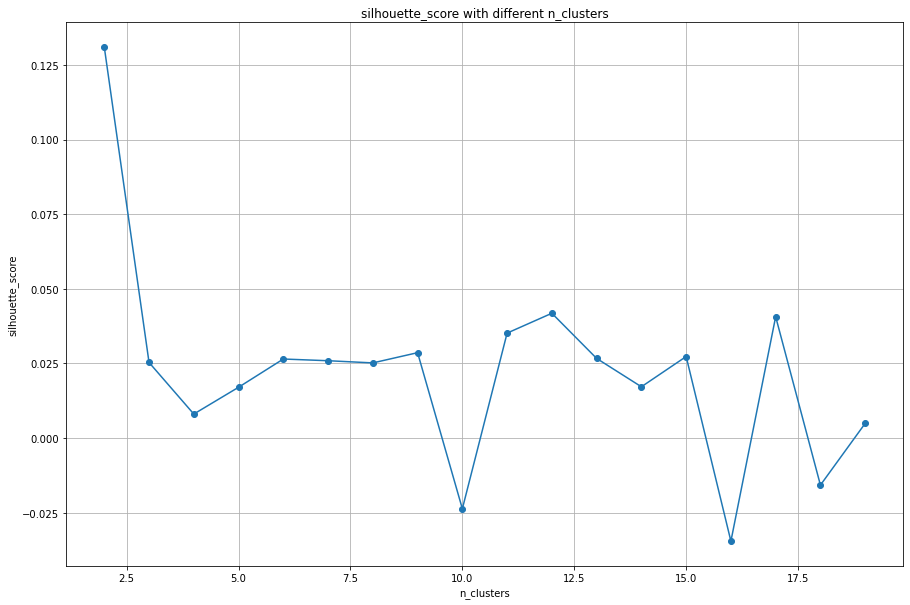

In [9]:
from sklearn.metrics import silhouette_score
silhouette=[]

for n_clusters in range(2,20):
    model=KMeans(n_clusters=n_clusters,init='k-means++').fit(words_metrix)
    # 计算轮廓系数
    score=silhouette_score(words_metrix,model.labels_)
    silhouette.append(score)

# 绘制图像
plt.figure(figsize=(15,10))
plt.plot(range(2,20),silhouette,marker='o')
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')
plt.title('silhouette_score with different n_clusters')
plt.grid()
plt.show()


### 绘制不同类别的词云图
从图中可以看出，当k=2时，轮廓系数最大，所以选择k=2

(962,)
(3402,)
<class 'pandas.core.series.Series'>


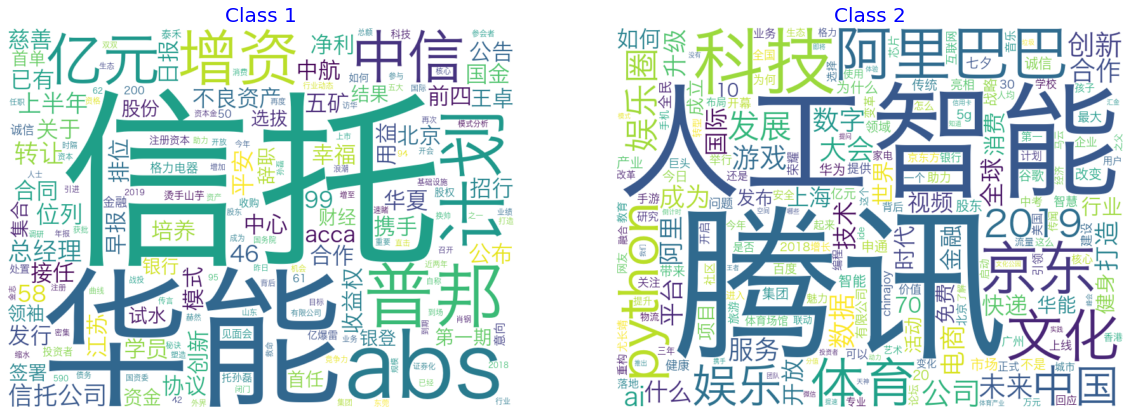

In [10]:
model=KMeans(n_clusters=2,init='k-means++').fit(words_metrix)
print(model.labels_.shape)

# 根据类别标签将词频矩阵划分为两部分
words_metric_class1=words_metrix[model.labels_==0]
words_metric_class2=words_metrix[model.labels_==1]

# 根据词频矩阵计算每一类的每个词的词频
word_freq_class1=words_metric_class1.sum(axis=0) # 求每一列的和
word_freq_class2=words_metric_class2.sum(axis=0)

print(word_freq_class1.shape) # (3402,)
print(type(word_freq_class1)) # Series


# 字体路径
font_path='/System/Library/Fonts/Hiragino Sans GB.ttc'

# 创建词云对象
words_class1=WordCloud(font_path=font_path,background_color='white',width=800,height=600).generate_from_frequencies(word_freq_class1)
words_class2=WordCloud(font_path=font_path,background_color='white',width=800,height=600).generate_from_frequencies(word_freq_class2)

# 创建一个新的图形窗口
plt.figure(figsize=(20, 10))

# 创建第一个子图，并在其中绘制第一个类别的词云图
plt.subplot(1, 2, 1)  # 1行2列的子图中的第1个
plt.imshow(words_class1, interpolation='bilinear')
plt.axis('off')
plt.title('Class 1',color='blue',fontsize=20)

# 创建第二个子图，并在其中绘制第二个类别的词云图
plt.subplot(1, 2, 2)  # 1行2列的子图中的第2个
plt.imshow(words_class2, interpolation='bilinear')
plt.axis('off')
plt.title('Class 2',color='blue',fontsize=20)

# 显示图形
plt.show()

### 结果分析
从词云图中可以看出，可以将新闻分为两类。第一类是关于政治方面，经济方面类的新闻，第二类是关于娱乐方面，科技方面的新闻。可见聚类达到了比较好的效果。